# Directing Customer to Subscription Through Financial App Behaviour Analysis

# Goal of the project:

### A company launch their android  and iOS base app to grow  their business. But there is a problem that, how to promote this app and offer who really want to utilize it. So for that company decided to give free trial to each and every customer for 24 hours and collect data from the customers. In this scenario some customer purchase the app and someone not. According to the company want to give special offer to the customer who are not interested to buy without offer and grow their business.


### This is a classification problem

# Import essential libraries

In [4]:
import numpy as np # for numerical calculations and operations
import pandas as pd # for data analysis and manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser  # convert time in date time datatype

# Import  dataset and Explore

In [5]:
company_df = pd. read_csv("C:\\codes\\ML Projects\\Direct Customer to subscription\\Company_subscription.csv")
company_df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
company_df.shape

(50000, 12)

In [7]:
company_df.tail(6) # show last six rows of dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [8]:
for i in [1,2,3,4,5]:
    print(company_df.loc[i, 'screen_list'], '\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [9]:
company_df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [10]:
company_df.info() # Brief information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [11]:
company_df.describe() # it gives the numeric distribution of the dataset

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
company_df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [13]:
# Get the unique value of each columns and it's length
features = company_df.columns
for i in features:
    print("Unique value of {}\n{}\nlen is {} \n ...........\n".
         format(i, company_df[i].unique(), len(company_df[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
 ...........

Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
 ...........

Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
 ...........

Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
 ...........

Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89

In [14]:
company_df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [15]:
# how data convert string to int

company_df['hour'] = company_df.hour.str.slice(1,3).astype(int)
type(company_df['hour'])

pandas.core.series.Series

In [16]:
# get datatype of each columns
company_df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [17]:
company_df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [18]:
# drop object dtype columns
company_df2 = company_df.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

In [19]:
# head of numeric dataframe
company_df2.head(6)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Data visualization

## heatmap using corelation matrix

Text(0.5, 1.0, 'heatmap using correlation matrix of company_df2')

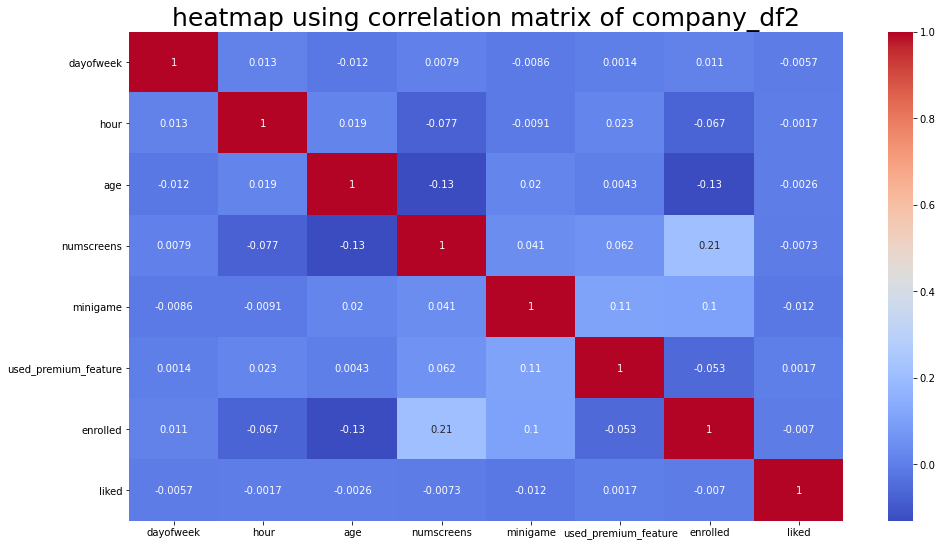

In [20]:
# Heatmap
plt.figure(figsize=(16,9)) # figure size of heatmap

sns.heatmap(company_df2.corr(), annot= True, cmap = 'coolwarm') #  heatmap

# Title of heatmap
plt.title("heatmap using correlation matrix of company_df2", fontsize = 25)

## pairplot of company_df2 

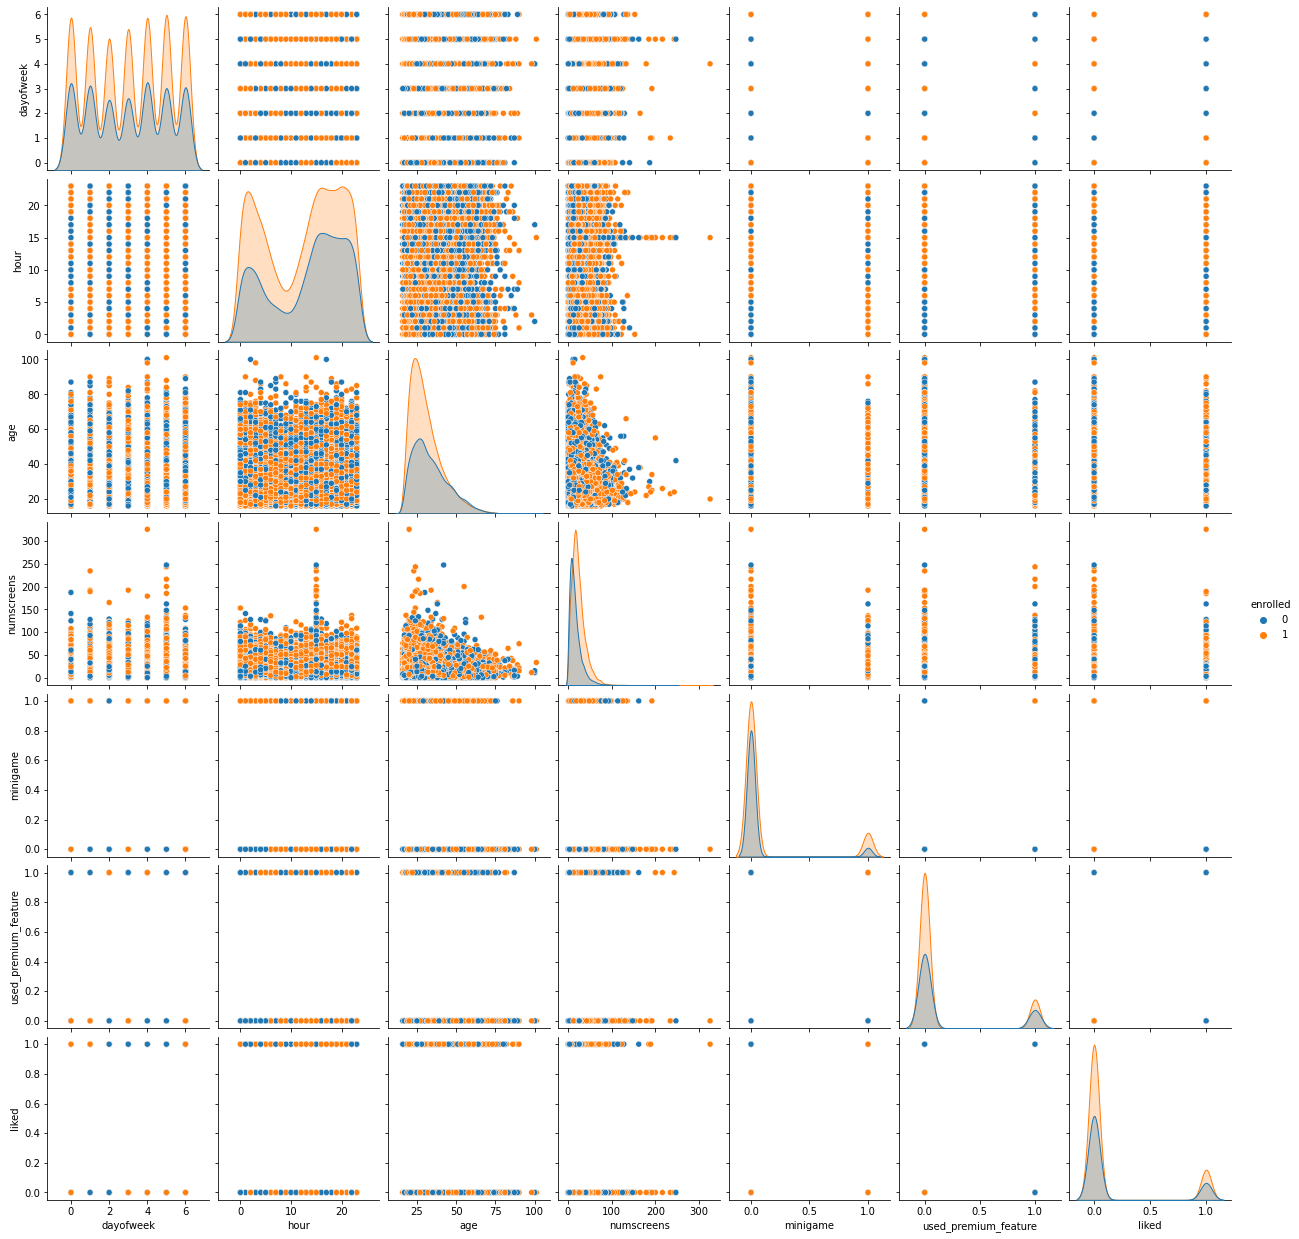

In [21]:
# pairplot of company_df2 dataset

# %matplotlib qt5 # for show the seperate window
sns.pairplot(company_df2, hue = "enrolled")

## Countplot of enrolled

C:\Users\krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

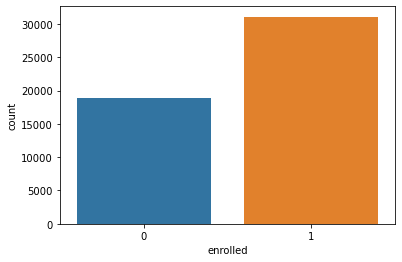

In [22]:
# show countplot of 'enrolled' feature
sns.countplot(company_df.enrolled)

In [23]:
# value enrolled and not enrolled customers
print("Not enrolled users = ", (company_df.enrolled == 0).sum(), "out of 50000")
print("Enrolled users = ", 50000-(company_df.enrolled == 0).sum(), "out of 50000")

Not enrolled users =  18926 out of 50000
Enrolled users =  31074 out of 50000


## Histogram of each Feature of company_df2

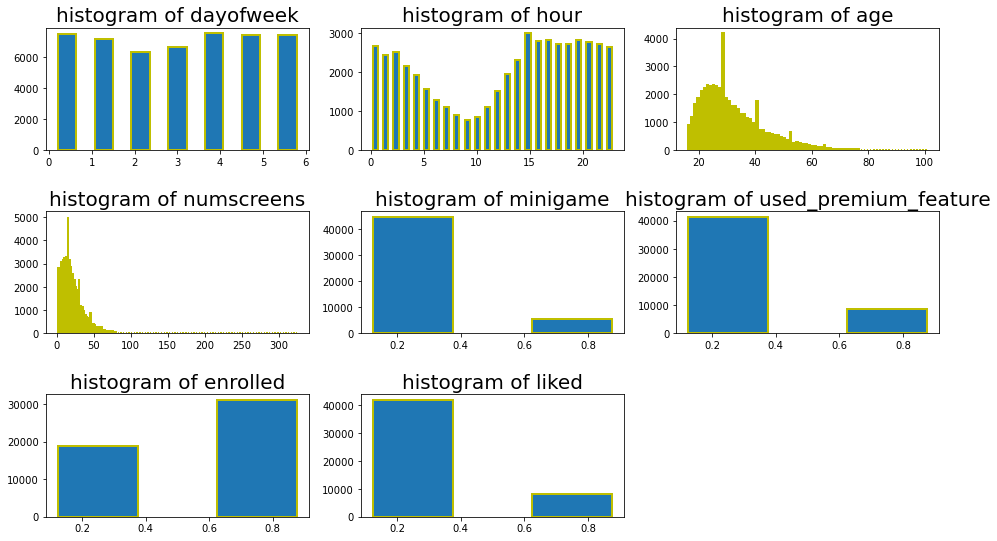

In [24]:
plt.figure(figsize = (16,9)) # Figure size
features = company_df2.columns #list of columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1) # create subplot of histogram
    plt.title(f"histogram of {j}", fontsize = 20) # title of each histogram
    
    bins = len(company_df2[j].unique()) # bins of histogram
    plt.hist(company_df2[j], bins = bins, rwidth = 0.5, edgecolor = "y", linewidth = 2)
    
plt.subplots_adjust(hspace = 0.5) # space between horizontal  axes (subplots)

In [25]:
for i,j in enumerate(features):
    print(i,j)

0 dayofweek
1 hour
2 age
3 numscreens
4 minigame
5 used_premium_feature
6 enrolled
7 liked


## Correlation barplot with 'enrolled' feature

C:\Users\krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


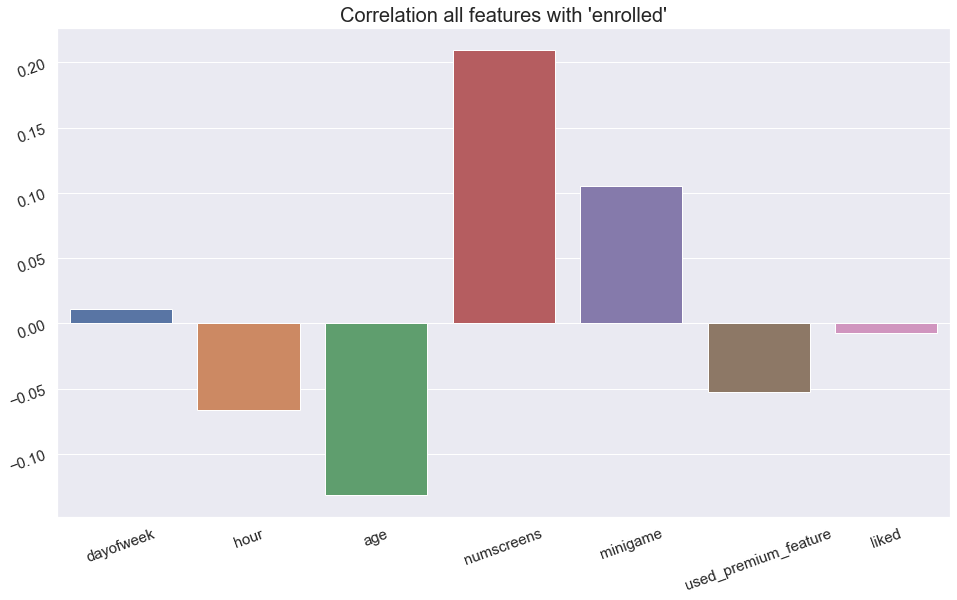

In [26]:
# Show correlation barplot

sns.set() # Set  background dark grid
plt.figure(figsize = (16,9))
plt.title("Correlation all features with 'enrolled'", fontsize = 20)
company_df3 = company_df2.drop(['enrolled'], axis = 1) #drop 'enrolled' feature
ax = sns.barplot(company_df3.columns, company_df3.corrwith(company_df2.enrolled)) # plot barplot
ax.tick_params(labelsize = 15, labelrotation = 20, color = 'g') # decorate x and y ticks font

In [27]:
# Parsing object data into date time format

company_df['first_open'] = [parser.parse(i) for i in company_df['first_open']]

In [28]:
company_df['enrolled_date'] = [parser.parse(i) if isinstance(i, str) else i for i in company_df['enrolled_date']]

In [29]:
company_df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [30]:
company_df['time_to_enrolled'] = (company_df.enrolled_date - company_df.first_open).astype('timedelta64')

(array([2.8195e+04, 1.0320e+03, 5.6600e+02, 4.2600e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([0.00000000e+00, 1.95648730e+15, 3.91297460e+15, 5.86946190e+15,
        7.82594920e+15, 9.78243650e+15, 1.17389238e+16, 1.36954111e+16,
        1.56518984e+16, 1.76083857e+16, 1.95648730e+16]),
 <BarContainer object of 10 artists>)

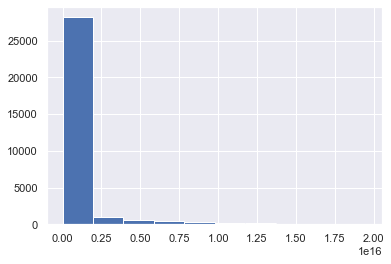

In [31]:
# plot  histogram

plt.hist(company_df['time_to_enrolled'].dropna())

(array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

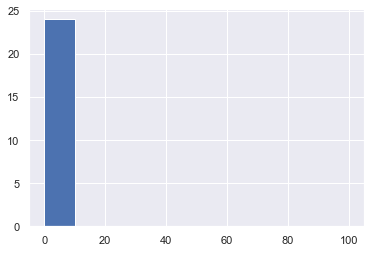

In [32]:
# plot histogram

plt.hist(company_df['time_to_enrolled'].dropna(), range = (0,100))

In [33]:
# Those customers have enrolled after 48 hours set as 0
company_df.loc[company_df.time_to_enrolled > 48, 'enrolled'] = 0

In [34]:
company_df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,2013-07-05 16:11:49.513,0,1.831590e+11
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,0,2013-02-26 18:56:37.841,1,3.491800e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,0,2013-05-09 13:47:52.875,0,9.500400e+10
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,0,2013-04-28 12:35:38.709,0,1.544210e+11


In [35]:
company_df.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace = True)

In [36]:
company_df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,0,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,0,0


In [38]:
# read csv file and convert it into numpy (top_screen  dataframe)
company_screen_df = pd.read_csv("D:\\study material\\ml tutorial\\sample csv files\\top_screens.csv").top_screens.values

In [39]:
company_screen_df

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [40]:
type(company_screen_df)

numpy.ndarray

In [41]:
# add ',' at the end of each string of 'screen_list' for furthur operations
company_df['screen_list'] = company_df.screen_list.astype(str) + ','
company_df['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [42]:
company_df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,0,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,0,0


In [43]:
# string into number

for screen_name in company_screen_df:
    company_df[screen_name] = company_df.screen_list.str.contains(screen_name).astype(int)
    company_df['screen_list'] = company_df.screen_list.str.replace(screen_name + "," , "")

In [44]:
# test
company_df.screen_list.str.contains("Splash").astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int32

In [45]:
# test

company_df.screen_list.str.replace("Splash,", "")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [46]:
# get shape
company_df.shape

(50000, 68)

In [47]:
# head of dataframe
company_df.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# remain list in 'screen list'

company_df.loc[0, 'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [49]:
#  count remain screen list and store countered data to remain_screen_count
company_df['remain_screen_list'] = company_df.screen_list.str.count(",")
company_df['remain_screen_list']

0         7
1         5
2         0
3         6
4        10
         ..
49995     6
49996     1
49997     6
49998    13
49999     5
Name: remain_screen_list, Length: 50000, dtype: int64

In [50]:
# Drop the screen_list
company_df.drop(columns = ['screen_list'], inplace = True)

In [51]:
company_df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [52]:
# total columns 
company_df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [53]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                 'Saving2',
                 'Saving2Amount',
                 'Saving4',
                 'Saving5',
                 'Saving6',
                 'Saving7',
                 'Saving8',
                 'Saving9',
                 'Saving10']
company_df['saving_screenscount'] = company_df[saving_screens].sum(axis = 1)
company_df.drop(columns = saving_screens, inplace = True)

In [54]:
company_df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screenscount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,0,1,1,...,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,0


In [55]:
credit_screens = ['Credit1',
                 'Credit2',
                 'Credit3',
                 'Credit3Container',
                 'Credit3Dashboard',
                ]
company_df['credit_screens_count'] = company_df[credit_screens].sum(axis=1)
company_df.drop(columns = credit_screens, axis = 1, inplace = True)

In [56]:
company_df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screenscount,credit_screens_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,7,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,5,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,3
4,51549,1,18,31,32,0,0,0,1,1,...,0,0,0,0,0,0,0,10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,1,0,0,0,0,0,0,6,0,2
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
49998,324905,6,12,27,26,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,0


In [57]:
cc_screens = ['CC1',
             'CC1Category',
             'CC3']
company_df['cc_screens_count'] = company_df[cc_screens].sum(axis=1)
company_df.drop(columns = cc_screens, axis = 1, inplace = True)

In [58]:
company_df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screenscount,credit_screens_count,cc_screens_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,0,0,...,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,0,1,1,...,0,0,0,0,0,0,10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,0,0,0,0,0,0,6,0,2,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
49998,324905,6,12,27,26,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0


In [59]:
loan_screens = ['Loan',
               'Loan2',
               'Loan3',
               'Loan4']
company_df['loan_screens_count'] = company_df[loan_screens].sum(axis=1)
company_df.drop(columns = loan_screens, axis = 1, inplace = True)

In [60]:
company_df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screenscount,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,0,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,0,0,1,...,0,0,0,0,0,13,0,0,0,0


In [61]:
company_df.shape

(50000, 50)

In [62]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [63]:
company_df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screenscount,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.000480,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.021904,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


## Heatmap with correlation matrix of new company_df

<AxesSubplot:>

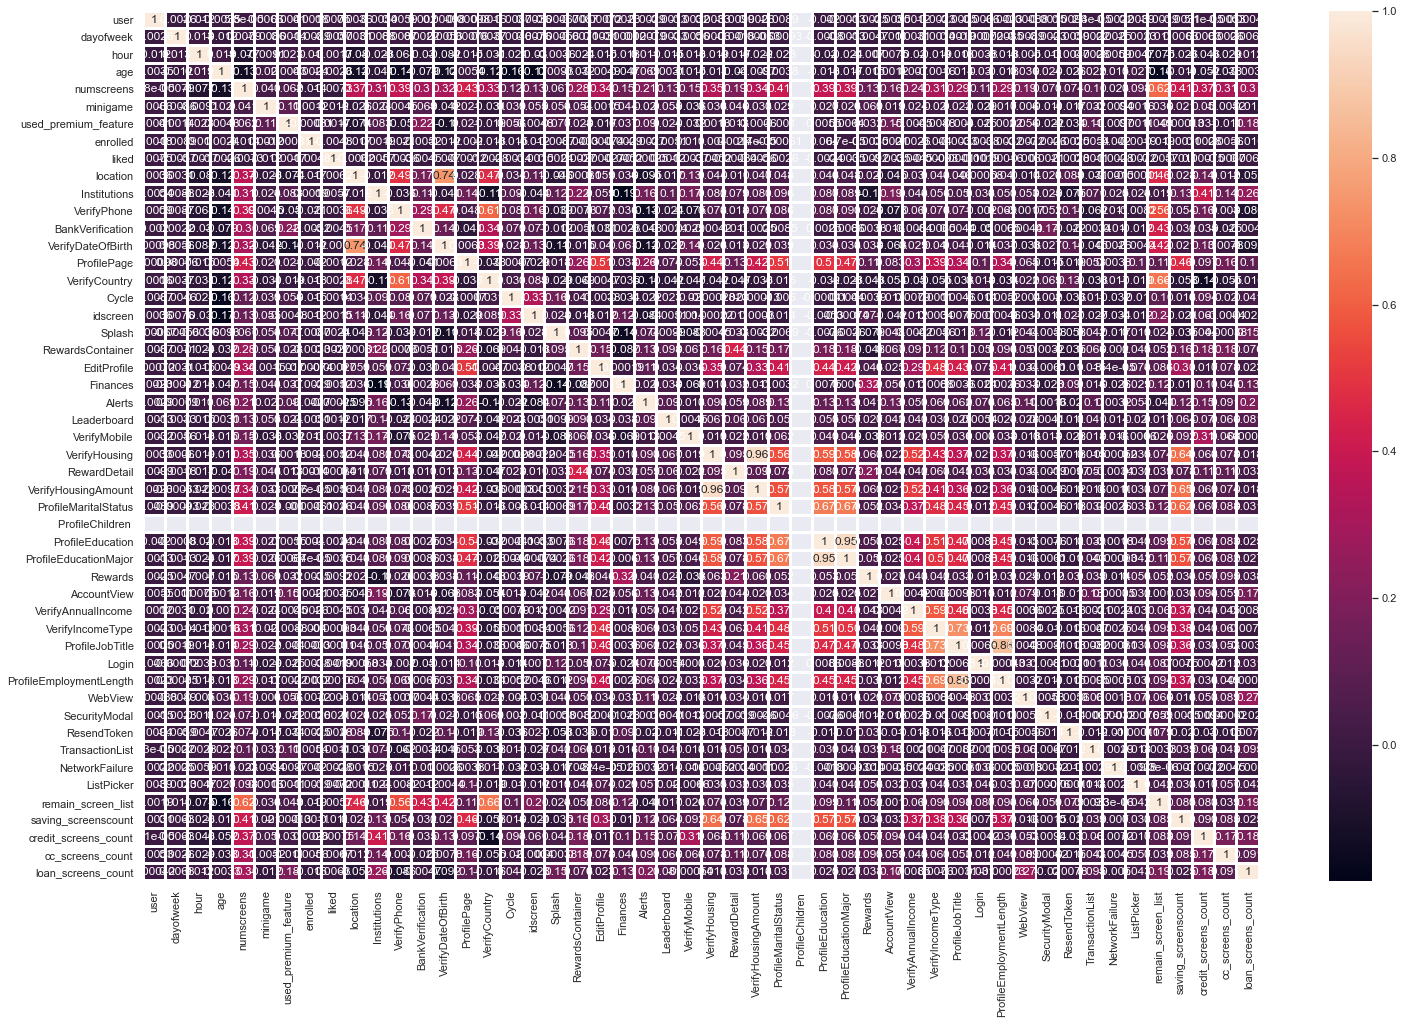

In [64]:
# Heatmap with correlation of new company_df

plt.figure(figsize = (25, 16))
sns.heatmap(company_df.corr(), annot = True, linewidth = 2)

In [65]:
company_df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'remain_screen_list',
       'saving_screenscount', 'credit_screens_count', 'cc_screens_count',
       'loan_screens_count'],
      dtype='object')

In [66]:
company_df['ProfileChildren '].unique()

array([0])

In [67]:
corr_matrix = company_df.corr()
corr_matrix['ProfileChildren ']

user                      NaN
dayofweek                 NaN
hour                      NaN
age                       NaN
numscreens                NaN
minigame                  NaN
used_premium_feature      NaN
enrolled                  NaN
liked                     NaN
location                  NaN
Institutions              NaN
VerifyPhone               NaN
BankVerification          NaN
VerifyDateOfBirth         NaN
ProfilePage               NaN
VerifyCountry             NaN
Cycle                     NaN
idscreen                  NaN
Splash                    NaN
RewardsContainer          NaN
EditProfile               NaN
Finances                  NaN
Alerts                    NaN
Leaderboard               NaN
VerifyMobile              NaN
VerifyHousing             NaN
RewardDetail              NaN
VerifyHousingAmount       NaN
ProfileMaritalStatus      NaN
ProfileChildren           NaN
ProfileEducation          NaN
ProfileEducationMajor     NaN
Rewards                   NaN
AccountVie

In [68]:
company_df['ProfileChildren ']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: ProfileChildren , Length: 50000, dtype: int32

# DATA PREPROCESSING

## Split Dataset into train and test

In [69]:
clean_company_df = company_df
target = company_df['enrolled']
company_df.drop(columns = 'enrolled', inplace = True)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(company_df, target, test_size = 0.2, random_state = 0)

In [71]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (40000, 49)
Shape of X_test :  (10000, 49)
Shape of y_train :  (40000,)
Shape of y_test :  (10000,)


In [72]:
# Take user ID in another variable 
train_userID = X_train['user']
X_train.drop(columns = 'user', inplace = True)
test_userID = X_test['user']
X_test.drop(columns = 'user', inplace = True)

C:\Users\krishna\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of train_userID : ", train_userID.shape)
print("Shape of test_userID : ", test_userID.shape)

Shape of X_train :  (40000, 48)
Shape of X_test :  (10000, 48)
Shape of train_userID :  (40000,)
Shape of test_userID :  (10000,)


## Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Model Building

In [81]:
# Import requires packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_score(y_test, y_pred_dt)

0.9988

In [77]:
# train with Standerd Scaling dataset

dt_model2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 340)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_dt_sc)

0.9985

# K-NN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn_model1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn_model1.fit(X_train, y_train)
y_pred_knn = knn_model1.predict(X_test)

accuracy_score(y_test, y_pred_knn) # It is also used to find out accuracy of model
# knn_model1.score(X_test, y_test)

0.9992

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_sc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn_model_sc.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model_sc.predict(X_test_sc)

accuracy_score(y_test, y_pred_knn_sc)

0.9992

# Naive Bayes

In [83]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_model = nb_model.predict(X_test)

accuracy_score(y_test, y_pred_model)

0.2797

In [84]:
# feature scaled data

from sklearn.naive_bayes import GaussianNB
nb_model_sc = GaussianNB()
nb_model_sc.fit(X_train_sc, y_train)
y_pred_model_sc = nb_model_sc.predict(X_test_sc)

accuracy_score(y_test, y_pred_model_sc)

0.2797

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 535)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9992

In [98]:
# Featured Scaled Data

from sklearn.ensemble import RandomForestClassifier
rf_model_sc = RandomForestClassifier(n_estimators = 30, criterion = 'gini', random_state = 3553)
rf_model_sc.fit(X_train_sc, y_train)
y_pred_sc_rffs = rf_model_sc.predict(X_test)

accuracy_score(y_test, y_pred_sc)

0.9992

# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 43, penalty = 'l2')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

accuracy_score(y_test, y_pred)

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9992

In [88]:
# Featured Scaled Data

from sklearn.linear_model import LogisticRegression
lr_model_sc = LogisticRegression(random_state = 43, penalty = 'l2')
lr_model_sc.fit(X_train_sc, y_train)
y_pred_sc = lr_model.predict(X_test_sc)

accuracy_score(y_test, y_pred)

0.9992

# Support Vector Classifier

In [89]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

svc_model.score(X_test, y_test)

0.9992

In [90]:
# Featured Scaled Data
from sklearn.svm import SVC
svc_model_sc = SVC()
svc_model_sc.fit(X_train_sc, y_train)
y_pred_sc = svc_model.predict(X_test_sc)

svc_model.score(X_test_sc, y_test)

0.9992

## Predicting value using random forest classifier model

In [99]:
np.c_[y_pred_sc_rffc]

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## We are using Random Forest Classification with feature scaled data to build model

In [95]:
import pickle

In [101]:
pickle.dump(rf_model_sc, open('C:\\codes\\ML Projects\\Direct Customer to subscription\\rf_model_sc', 'wb'))

In [102]:
model_pickle_load = pickle.load(open('C:\\codes\\ML Projects\\Direct Customer to subscription\\rf_model_sc', 'rb'))

In [105]:
model_pickle_load.predict(X_test_sc)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)